<a href="https://colab.research.google.com/github/amirularsyad/MachineLearningCourse_HW_TelU/blob/main/6thWeek/K_Means_Clustering_Dataset_Lainnya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rayyan Ramanda (1103200202)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ganti path dengan lokasi dataset yang ada
file_path = ('/content/drive/MyDrive/Dataset/diamonds.csv')

# membaca dataset kedalam dataframe
data = pd.read_csv(file_path)

# menampilkan beberapa baris pertama dari dataframe
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Menggunakan kolom 'carat' dan 'price' untuk clustering
X = data.iloc[:, [1, 7]].values

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Menentukan jumlah cluster (K) dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

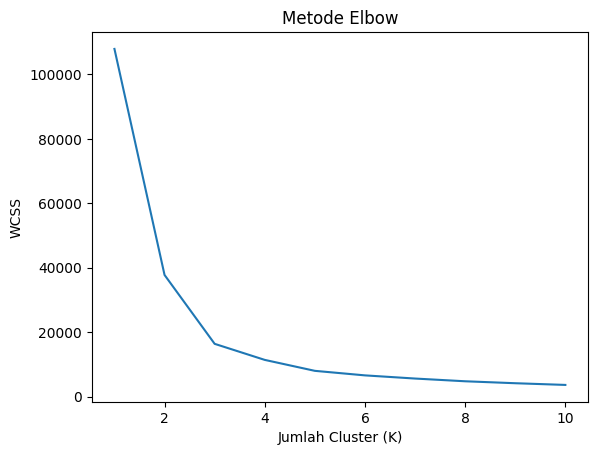

In [ ]:
# Menampilkan grafik Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')  # WCSS (Within-Cluster-Sum-of-Squares) menurun dengan peningkatan K
plt.show()

In [ ]:
# Melakukan K-Means Clustering dengan jumlah cluster yang telah dipilih (misalnya, K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [ ]:
# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

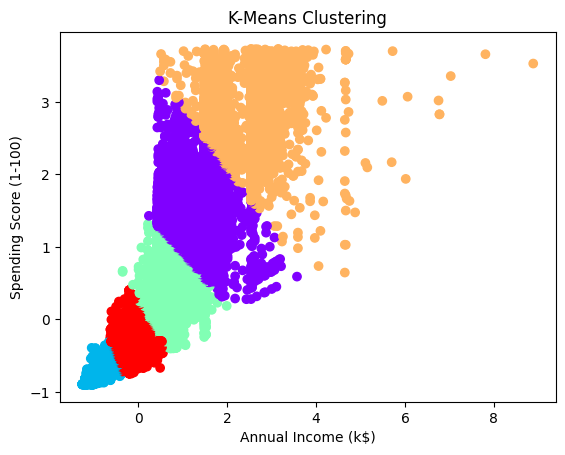

In [ ]:
# Menampilkan hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

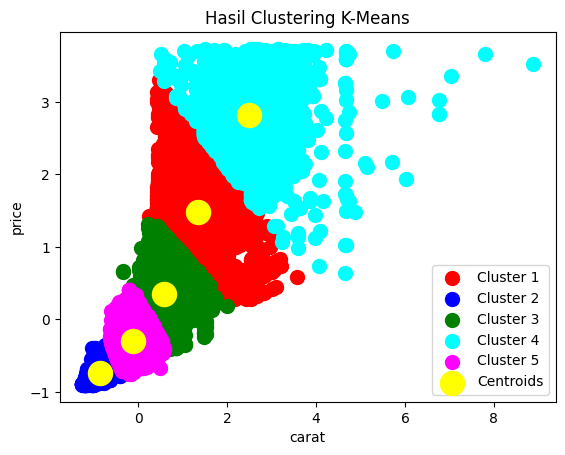

In [ ]:
# Menampilkan sebaran data dan hasil clustering dengan warna yang berbeda
plt.scatter(X[data['Cluster'] == 0, 0], X[data['Cluster'] == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[data['Cluster'] == 1, 0], X[data['Cluster'] == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[data['Cluster'] == 2, 0], X[data['Cluster'] == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[data['Cluster'] == 3, 0], X[data['Cluster'] == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[data['Cluster'] == 4, 0], X[data['Cluster'] == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()
plt.show()